### [PySpark](https://spark.apache.org/docs/latest/api/python/index.html)

PySpark é uma interface para Apache Spark em Python. Ele não apenas permite que você escreva aplicativos Spark usando APIs Python, mas também fornece o *shell* PySpark para analisar interativamente seus dados em um ambiente distribuído. O PySpark oferece suporte à maioria dos recursos do Spark, como Spark SQL, DataFrame, Streaming, MLlib (Machine Learning) e Spark Core.

<center><img src="https://caelum-online-public.s3.amazonaws.com/2273-introducao-spark/01/img-001.png"/></center>

#### Spark SQL e DataFrame

Spark SQL é um módulo Spark para processamento de dados estruturados. Ele fornece uma abstração de programação chamada DataFrame e também pode atuar como mecanismo de consulta SQL distribuído.

#### Spark Streaming

Executando em cima do Spark, o recurso de *streaming* no Apache Spark possibilita o uso de poderosas aplicações interativas e analíticas em *streaming* e dados históricos, enquanto herda a facilidade de uso do Spark e as características de tolerância a falhas.

#### Spark MLlib

Construído sobre o Spark, MLlib é uma biblioteca de aprendizado de máquina escalonável que fornece um conjunto uniforme de APIs de alto nível que ajudam os usuários a criar e ajustar *pipelines* de aprendizado de máquina práticos.

#### Spark Core

Spark Core é o mecanismo de execução geral subjacente para a plataforma Spark sobre o qual todas as outras funcionalidades são construídas. Ele fornece um RDD (*Resilient Distributed Dataset*) e recursos de computação na memória.

In [1]:
# Já temos tudo configurado, basta agora instalar em nosso notebook e realizar as configurações

!conda install pyspark -y

Solving environment: done

# All requested packages already installed.



In [2]:
# Pacotes necessários para rodarmos o Spark
import findspark
findspark.find()
findspark.init()
import pyspark

## [SparkSession](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.sql.SparkSession.html)

O ponto de entrada para programar o Spark com a API Dataset e DataFrame.

Uma SparkSession pode ser utilizada para criar DataFrames, registrar DataFrames como tabelas, executar consultas SQL em tabelas, armazenar em cache e ler arquivos parquet. Para criar uma SparkSession, use o seguinte padrão de construtor:

In [3]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

In [4]:
# Informações do Spark
spark

## DataFrames com Spark


### Interfaces Spark

Existem três interfaces principais do Apache Spark que você deve conhecer: Resilient Distributed Dataset (Que já falamos na aula anterior), DataFrame e Dataset.

- **Resilient Distributed Dataset**: A primeira abstração do Apache Spark foi o Resilient Distributed Dataset (RDD). É uma interface para uma sequência de objetos de dados que consiste em um ou mais tipos localizados em uma coleção de máquinas (um cluster). Os RDDs podem ser criados de várias maneiras e são a API de “nível mais baixo” disponível. Embora esta seja a estrutura de dados original do Apache Spark, você deve se concentrar na API DataFrame, que é um superconjunto da funcionalidade RDD. A API RDD está disponível nas linguagens Java, Python e Scala.

- **DataFrame**: Trata-se de um conceito similar ao DataFrame que você pode estar familiarizado como o pacote pandas do Python e a linguagem R . A API DataFrame está disponível nas linguagens Java, Python, R e Scala.

- **Dataset**: uma combinação de DataFrame e RDD. Ele fornece a interface digitada que está disponível em RDDs enquanto fornece a conveniência do DataFrame. A API Dataset está disponível nas linguagens Java e Scala.

Em muitos cenários, especialmente com as otimizações de desempenho incorporadas em DataFrames e Datasets, não será necessário trabalhar com RDDs. Mas é importante entender a abstração RDD porque:

- O RDD é a infraestrutura subjacente que permite que o Spark seja executado com tanta rapidez e forneça a linhagem de dados.

- Se você estiver mergulhando em componentes mais avançados do Spark, pode ser necessário usar RDDs.

- As visualizações na Spark UI fazem referência a RDDs.

## Iniciando os trabalhos...

In [5]:
data = [("Zeca",35), ("Joao",46)]
colus = ['Nome', 'Idade']
df = spark.createDataFrame(data,colus)
df.show()

+----+-----+
|Nome|Idade|
+----+-----+
|Zeca|   35|
|Joao|   46|
+----+-----+



In [6]:
df.toPandas()

,Nome,Idade
0,Zeca,35
1,Joao,46


## Vamos verificar então as Funções pelo Pyspark no Dataframe

- Imagine que queiramos o total de vendas de um determinado produto (no nosso caso, Pão)

In [7]:
# Importando a biblioteca necessária

from pyspark.sql.functions import sum 

In [8]:
# Criando o Dataframe

schema = "Produtos String, Vendas INT"
vendas = [["Pao",10],["Manteiga",2],["Pao",5]]
df = spark.createDataFrame(vendas,schema)
df.show()

+--------+------+
|Produtos|Vendas|
+--------+------+
|     Pao|    10|
|Manteiga|     2|
|     Pao|     5|
+--------+------+



In [9]:
# Convertendo para exemplo

df.toPandas()

,Produtos,Vendas
0,Pao,10
1,Manteiga,2
2,Pao,5


In [10]:
# informações do Dataframe
df.schema

#df.columns

StructType(List(StructField(Produtos,StringType,true),StructField(Vendas,IntegerType,true)))

In [11]:
# Como o DataFrame é imutável, para apresentar uma alteração é necessário criar um outro DataFrame

agrupado = df.groupBy("Produtos").agg(sum("Vendas"))
agrupado.show()

+--------+-----------+
|Produtos|sum(Vendas)|
+--------+-----------+
|     Pao|         15|
|Manteiga|          2|
+--------+-----------+



In [12]:
# Poderia também fazer a apresentação seguindo a mesma lógica porém, 
# alterando a ordem de apresentação dos comandos:

df.groupBy("Produtos").agg(sum("Vendas")).show()

+--------+-----------+
|Produtos|sum(Vendas)|
+--------+-----------+
|     Pao|         15|
|Manteiga|          2|
+--------+-----------+



In [13]:
# Para grandes conjuntos de dados, podemos em algum momento ter a necessidade de visualizar as informações 
# das colunas, então:

df.select("Produtos").show()

+--------+
|Produtos|
+--------+
|     Pao|
|Manteiga|
|     Pao|
+--------+



In [14]:
# Também podemos inverter a posição das colunas na apresentação:

df.select("Vendas","Produtos").show() 

+------+--------+
|Vendas|Produtos|
+------+--------+
|    10|     Pao|
|     2|Manteiga|
|     5|     Pao|
+------+--------+



## Porcentagem de vendas
---

In [15]:
# Importando a biblioteca de funções do sql
from pyspark.sql.functions import expr

In [16]:
# Calculando 20% das vendas

df.select("Produtos","Vendas", expr("Vendas * 0.2")).show()

+--------+------+--------------+
|Produtos|Vendas|(Vendas * 0.2)|
+--------+------+--------------+
|     Pao|    10|           2.0|
|Manteiga|     2|           0.4|
|     Pao|     5|           1.0|
+--------+------+--------------+



In [17]:
# Ou ainda menos 20 %

df.select("Produtos","Vendas", expr("Vendas - 0.2")).show()

+--------+------+--------------+
|Produtos|Vendas|(Vendas - 0.2)|
+--------+------+--------------+
|     Pao|    10|           9.8|
|Manteiga|     2|           1.8|
|     Pao|     5|           4.8|
+--------+------+--------------+



## Trabalhando com Banco de Dados

In [18]:
from pyspark.sql.types import *

In [19]:
# Efetuei o Download de um diretório contendo o conjunto de dados que será utilizado em nossos experimentos.
# O arquivo que será utilizado agora é o despachante.csv
# Existem duas formas de ler arquivo, o read.csv e o read_load(lê qualquer tipo de arquivo.

arq_schema = "id INT, nome STRING, status STRING, cidade STRING, vendas INT, data STRING"
despachantes = spark.read.csv('/home/clayton/download/despachantes.csv', header=False, schema=arq_schema)
despachantes.show()

+---+-------------------+------+-------------+------+----------+
| id|               nome|status|       cidade|vendas|      data|
+---+-------------------+------+-------------+------+----------+
|  1|   Carminda Pestana| Ativo|  Santa Maria|    23|2020-08-11|
|  2|    Deolinda Vilela| Ativo|Novo Hamburgo|    34|2020-03-05|
|  3|   Emídio Dornelles| Ativo| Porto Alegre|    34|2020-02-05|
|  4|Felisbela Dornelles| Ativo| Porto Alegre|    36|2020-02-05|
|  5|     Graça Ornellas| Ativo| Porto Alegre|    12|2020-02-05|
|  6|   Matilde Rebouças| Ativo| Porto Alegre|    22|2019-01-05|
|  7|    Noêmia   Orriça| Ativo|  Santa Maria|    45|2019-10-05|
|  8|      Roque Vásquez| Ativo| Porto Alegre|    65|2020-03-05|
|  9|      Uriel Queiroz| Ativo| Porto Alegre|    54|2018-05-05|
| 10|   Viviana Sequeira| Ativo| Porto Alegre|     0|2020-09-05|
+---+-------------------+------+-------------+------+----------+



## Agora, vamos solicitar ao Spark que ele "Infira" o schema
---

**-> format:** necessário para informar o tipo do arquivo que estou lendo;

**-> sep:** dependendo do tipo do arquivo é o parâmetro que terei que passar;

**-> inferSchema:** Setado como True para que o Spark "infira" o tipo do dado da coluna.

In [20]:
desp_autoschema = spark.read.load('/home/clayton/download/despachantes.csv', header=False, format="csv",sep=",", inferSchema=True)
desp_autoschema.show()

+---+-------------------+-----+-------------+---+----------+
|_c0|                _c1|  _c2|          _c3|_c4|       _c5|
+---+-------------------+-----+-------------+---+----------+
|  1|   Carminda Pestana|Ativo|  Santa Maria| 23|2020-08-11|
|  2|    Deolinda Vilela|Ativo|Novo Hamburgo| 34|2020-03-05|
|  3|   Emídio Dornelles|Ativo| Porto Alegre| 34|2020-02-05|
|  4|Felisbela Dornelles|Ativo| Porto Alegre| 36|2020-02-05|
|  5|     Graça Ornellas|Ativo| Porto Alegre| 12|2020-02-05|
|  6|   Matilde Rebouças|Ativo| Porto Alegre| 22|2019-01-05|
|  7|    Noêmia   Orriça|Ativo|  Santa Maria| 45|2019-10-05|
|  8|      Roque Vásquez|Ativo| Porto Alegre| 65|2020-03-05|
|  9|      Uriel Queiroz|Ativo| Porto Alegre| 54|2018-05-05|
| 10|   Viviana Sequeira|Ativo| Porto Alegre|  0|2020-09-05|
+---+-------------------+-----+-------------+---+----------+



In [21]:
# Mas....Será que o Spark acertou o tipo dos dados??
despachantes.schema

StructType(List(StructField(id,IntegerType,true),StructField(nome,StringType,true),StructField(status,StringType,true),StructField(cidade,StringType,true),StructField(vendas,IntegerType,true),StructField(data,StringType,true)))

In [22]:
desp_autoschema.schema

StructType(List(StructField(_c0,IntegerType,true),StructField(_c1,StringType,true),StructField(_c2,StringType,true),StructField(_c3,StringType,true),StructField(_c4,IntegerType,true),StructField(_c5,StringType,true)))

## Criando funções no Spark

- Buscando valores de vendas > 20

In [23]:
from pyspark.sql import functions as func     
despachantes.select("id","nome","vendas").where(func.col("vendas") > 20).show()

+---+-------------------+------+
| id|               nome|vendas|
+---+-------------------+------+
|  1|   Carminda Pestana|    23|
|  2|    Deolinda Vilela|    34|
|  3|   Emídio Dornelles|    34|
|  4|Felisbela Dornelles|    36|
|  6|   Matilde Rebouças|    22|
|  7|    Noêmia   Orriça|    45|
|  8|      Roque Vásquez|    65|
|  9|      Uriel Queiroz|    54|
+---+-------------------+------+



In [24]:
# Lembrando que o Spark também utiliza os operadores lógicos &=AND, |=OR, ~=NOT

despachantes.select("id","nome","vendas").where((func.col("vendas") > 20) & (func.col("vendas") < 40)).show()

+---+-------------------+------+
| id|               nome|vendas|
+---+-------------------+------+
|  1|   Carminda Pestana|    23|
|  2|    Deolinda Vilela|    34|
|  3|   Emídio Dornelles|    34|
|  4|Felisbela Dornelles|    36|
|  6|   Matilde Rebouças|    22|
+---+-------------------+------+



## BD com PySpark


<center><img src="https://dwgeek.com/wp-content/uploads/2019/01/Spark-SQL-Performance-Tuning.jpg"/></center>

- Posso transformar um Dataframe em uma tabela ou uma tabela em um Dataframe;


In [30]:
from pyspark.sql.types import *

In [33]:
# Vamos visualizar nosso banco de dados que vem com o Hide: Temos apenas o banco default

spark.sql("show databases").show()

+---------+
|namespace|
+---------+
|      ai2|
|  default|
+---------+



In [32]:
# Vamos criar nosso database (Retorno com o show() para apresentar o banco criado)

spark.sql("create database Ai2")

DataFrame[]

In [34]:
# Agora setamos o banco que iremos utilizar durante nossos experimentos, se não ele ainda salva no default.

spark.sql("use ai2").show()

++
||
++
++



In [35]:
# Lembram-se que trabalhamos na aula passada com o dataset despachantes?
# Vamos usar novamente como exemplo o conjunto de dados despachantes.csv

arqschema = "id INT, nome STRING, status STRING, cidade STRING, vendas INT, data STRING"
despa = spark.read.csv("/media/clayton/NewDisk/Ai2/04-PySpark/data/despachantes.csv", header=False, schema=arqschema)
despa.show()

+---+-------------------+------+-------------+------+----------+
| id|               nome|status|       cidade|vendas|      data|
+---+-------------------+------+-------------+------+----------+
|  1|   Carminda Pestana| Ativo|  Santa Maria|    23|2020-08-11|
|  2|    Deolinda Vilela| Ativo|Novo Hamburgo|    34|2020-03-05|
|  3|   Emídio Dornelles| Ativo| Porto Alegre|    34|2020-02-05|
|  4|Felisbela Dornelles| Ativo| Porto Alegre|    36|2020-02-05|
|  5|     Graça Ornellas| Ativo| Porto Alegre|    12|2020-02-05|
|  6|   Matilde Rebouças| Ativo| Porto Alegre|    22|2019-01-05|
|  7|    Noêmia   Orriça| Ativo|  Santa Maria|    45|2019-10-05|
|  8|      Roque Vásquez| Ativo| Porto Alegre|    65|2020-03-05|
|  9|      Uriel Queiroz| Ativo| Porto Alegre|    54|2018-05-05|
| 10|   Viviana Sequeira| Ativo| Porto Alegre|     0|2020-09-05|
+---+-------------------+------+-------------+------+----------+



In [36]:
# Visualizando no pandas 

despa.toPandas()

,id,nome,status,cidade,vendas,data
0,1,Carminda Pestana,Ativo,Santa Maria,23,2020-08-11
1,2,Deolinda Vilela,Ativo,Novo Hamburgo,34,2020-03-05
2,3,Emídio Dornelles,Ativo,Porto Alegre,34,2020-02-05
3,4,Felisbela Dornelles,Ativo,Porto Alegre,36,2020-02-05
4,5,Graça Ornellas,Ativo,Porto Alegre,12,2020-02-05
5,6,Matilde Rebouças,Ativo,Porto Alegre,22,2019-01-05
6,7,Noêmia Orriça,Ativo,Santa Maria,45,2019-10-05
7,8,Roque Vásquez,Ativo,Porto Alegre,65,2020-03-05
8,9,Uriel Queiroz,Ativo,Porto Alegre,54,2018-05-05
9,10,Viviana Sequeira,Ativo,Porto Alegre,0,2020-09-05


In [37]:
# Vamos agora listar se existe alguma tabela no nosso BD
# Listando as tabelas do banco, podemos verificar que não temos nenhuma

spark.sql("show tables").show()

+---------+---------+-----------+
|namespace|tableName|isTemporary|
+---------+---------+-----------+
+---------+---------+-----------+



In [39]:
# Transformando do Dataframe em uma tabela no nosso BD
# Como setamos nosso banco então, essa tabela só irá existir no nosso BD

despa.write.saveAsTable("Despachantes")

#### Tabela Gerenciada

In [47]:
# Verificando o objeto tabela no banco, irá nos retornar um Dataframe

spark.sql("select * from despachantes").show()


#despachantes = spark.sql("select * from despachantes")
#despachantes.show()

+---+-------------------+------+-------------+------+----------+
| id|               nome|status|       cidade|vendas|      data|
+---+-------------------+------+-------------+------+----------+
|  1|   Carminda Pestana| Ativo|  Santa Maria|    23|2020-08-11|
|  2|    Deolinda Vilela| Ativo|Novo Hamburgo|    34|2020-03-05|
|  3|   Emídio Dornelles| Ativo| Porto Alegre|    34|2020-02-05|
|  4|Felisbela Dornelles| Ativo| Porto Alegre|    36|2020-02-05|
|  5|     Graça Ornellas| Ativo| Porto Alegre|    12|2020-02-05|
|  6|   Matilde Rebouças| Ativo| Porto Alegre|    22|2019-01-05|
|  7|    Noêmia   Orriça| Ativo|  Santa Maria|    45|2019-10-05|
|  8|      Roque Vásquez| Ativo| Porto Alegre|    65|2020-03-05|
|  9|      Uriel Queiroz| Ativo| Porto Alegre|    54|2018-05-05|
| 10|   Viviana Sequeira| Ativo| Porto Alegre|     0|2020-09-05|
+---+-------------------+------+-------------+------+----------+



In [46]:
# Vamos ver agora se existe nossa tabela no BD

spark.sql("show tables").show()

+---------+------------+-----------+
|namespace|   tableName|isTemporary|
+---------+------------+-----------+
|      ai2|despachantes|      false|
+---------+------------+-----------+



In [45]:
# se eu mudar para o banco Default, ele irá mostrar que a tabela não foi encontrada.

#spark.sql("use default").show()

# VOlto para nosso BD
spark.sql("use ai2").show()

++
||
++
++



In [48]:
# Após termos criado nossa tabela, caso exista a necessidade de alteração temos duas formas de realizá-las, 
# overwrite e append através do comando mode

# Appende = Para alterar registros na tabela
# Overwrite =  Recriando a tabela
# Nada irá acontecer aqui, pq ele só está reescrevendo o file

despa.write.mode("overwrite").saveAsTable("Despachantes")

In [50]:
# Nossa tabela existe no BD, lembrando que é gerenciada.

spark.sql("select * from despachantes").show()

+---+-------------------+------+-------------+------+----------+
| id|               nome|status|       cidade|vendas|      data|
+---+-------------------+------+-------------+------+----------+
|  1|   Carminda Pestana| Ativo|  Santa Maria|    23|2020-08-11|
|  2|    Deolinda Vilela| Ativo|Novo Hamburgo|    34|2020-03-05|
|  3|   Emídio Dornelles| Ativo| Porto Alegre|    34|2020-02-05|
|  4|Felisbela Dornelles| Ativo| Porto Alegre|    36|2020-02-05|
|  5|     Graça Ornellas| Ativo| Porto Alegre|    12|2020-02-05|
|  6|   Matilde Rebouças| Ativo| Porto Alegre|    22|2019-01-05|
|  7|    Noêmia   Orriça| Ativo|  Santa Maria|    45|2019-10-05|
|  8|      Roque Vásquez| Ativo| Porto Alegre|    65|2020-03-05|
|  9|      Uriel Queiroz| Ativo| Porto Alegre|    54|2018-05-05|
| 10|   Viviana Sequeira| Ativo| Porto Alegre|     0|2020-09-05|
+---+-------------------+------+-------------+------+----------+



In [53]:
# Se eu saio da sessão, como disse anteriormente nosso Dataframe não existirá mais então, tenho que salvar.a
# Salvando em disco para consulta do Spark com metadados

despachantes.write.format("parquet").save("/media/clayton/NewDisk/Ai2/12-PySpark/data/desp_parquet")

#### Tabela não Gerenciada

In [56]:
# Criando um "alias" de uma tabela externa através do path
# Spark entende através do path que estamos criando uma tabela não gerenciada

despachantes.write.option("path","/media/clayton/NewDisk/Ai2/12-PySpark/data/desp_parquet").saveAsTable("Despachantes_ng")

In [55]:
# Caso aconteça de recebermos um erro por não deixar salvar o arquivo, precisamos alterar a permissão do sql
# com o comando apresentado:

spark.conf.set("spark.sql.legacy.allowNonEmptyLocationInCTAS","true")

In [59]:
# Então podemos fazer uma nova consulta e verificar nossa tabela.

spark.sql("select * from despachantes_ng").show()

+---+-------------------+------+-------------+------+----------+
| id|               nome|status|       cidade|vendas|      data|
+---+-------------------+------+-------------+------+----------+
|  1|   Carminda Pestana| Ativo|  Santa Maria|    23|2020-08-11|
|  2|    Deolinda Vilela| Ativo|Novo Hamburgo|    34|2020-03-05|
|  3|   Emídio Dornelles| Ativo| Porto Alegre|    34|2020-02-05|
|  4|Felisbela Dornelles| Ativo| Porto Alegre|    36|2020-02-05|
|  5|     Graça Ornellas| Ativo| Porto Alegre|    12|2020-02-05|
|  6|   Matilde Rebouças| Ativo| Porto Alegre|    22|2019-01-05|
|  7|    Noêmia   Orriça| Ativo|  Santa Maria|    45|2019-10-05|
|  8|      Roque Vásquez| Ativo| Porto Alegre|    65|2020-03-05|
|  9|      Uriel Queiroz| Ativo| Porto Alegre|    54|2018-05-05|
| 10|   Viviana Sequeira| Ativo| Porto Alegre|     0|2020-09-05|
+---+-------------------+------+-------------+------+----------+



#### Com essas duas tabelas, como saberemos se uma tabela é gerenciada ou não?

In [63]:
# Forma 1: Verificar se existe um caminho físico (Tabela externa, não Gerenciada)
# Essa tabela não é gerenciada!!
# truncate: compacta a saída que será apresentada

# O resultado será a apresentação dos comandos para a criação da tabela

spark.sql("show create table Despachantes").show(truncate=False)

+--------------------------------------------------------------------------------------------------------------------------------------------------------------+
|createtab_stmt                                                                                                                                                |
+--------------------------------------------------------------------------------------------------------------------------------------------------------------+
|CREATE TABLE `ai2`.`Despachantes` (\n  `id` INT,\n  `nome` STRING,\n  `status` STRING,\n  `cidade` STRING,\n  `vendas` INT,\n  `data` STRING)\nUSING parquet\n|
+--------------------------------------------------------------------------------------------------------------------------------------------------------------+



In [66]:
# Verificando a tavela _ng
# Podemos então verificar que essa tabela possui um LOCATION
# Tabela não gerenciada!!!

spark.sql("show create table Despachantes_ng").show(truncate=False)

+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|createtab_stmt                                                                                                                                                                                                                            |
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|CREATE TABLE `ai2`.`Despachantes_ng` (\n  `id` INT,\n  `nome` STRING,\n  `status` STRING,\n  `cidade` STRING,\n  `vendas` INT,\n  `data` STRING)\nUSING parquet\nLOCATION 'file:/media/clayton/NewDisk/Ai2/12-PySpark/data/desp_parquet'\n|
+---------------------------------------------------

In [68]:
# Forma 2: Através de um método "catalog" com listTables
# Ele apresenta qual gerenciadas e qual é externa

spark.catalog.listTables()

[Table(name='despachantes', database='ai2', description=None, tableType='MANAGED', isTemporary=False),
 Table(name='despachantes_ng', database='ai2', description=None, tableType='EXTERNAL', isTemporary=False)]

### Criando Views

- Sabemos o path das nossas tabelas externas (não gerenciadas) estão, mas onde estão as tabelas gerenciadas? Onde o Hide armazena essas tabelas?


In [79]:
# Diretório .db no original

#!ls /home/clayton/spark-warehouse/

#Eu alterei meu path então, está em outro caminho meu Hide
!ls /home/clayton/spark_01_parquet/

despachantes.parquet  _SUCCESS


In [89]:
# irá me retornar um erro pq preciso avisar que essa view será global

despachantes.createOrReplaceGlobalTempView("despachantes_view2")
spark.sql("select * from global_temp.despachantes_view2").show()

+---+-------------------+------+-------------+------+----------+
| id|               nome|status|       cidade|vendas|      data|
+---+-------------------+------+-------------+------+----------+
|  1|   Carminda Pestana| Ativo|  Santa Maria|    23|2020-08-11|
|  2|    Deolinda Vilela| Ativo|Novo Hamburgo|    34|2020-03-05|
|  3|   Emídio Dornelles| Ativo| Porto Alegre|    34|2020-02-05|
|  4|Felisbela Dornelles| Ativo| Porto Alegre|    36|2020-02-05|
|  5|     Graça Ornellas| Ativo| Porto Alegre|    12|2020-02-05|
|  6|   Matilde Rebouças| Ativo| Porto Alegre|    22|2019-01-05|
|  7|    Noêmia   Orriça| Ativo|  Santa Maria|    45|2019-10-05|
|  8|      Roque Vásquez| Ativo| Porto Alegre|    65|2020-03-05|
|  9|      Uriel Queiroz| Ativo| Porto Alegre|    54|2018-05-05|
| 10|   Viviana Sequeira| Ativo| Porto Alegre|     0|2020-09-05|
+---+-------------------+------+-------------+------+----------+



In [91]:
# Posso criar uma view temporária no Spark utilizando comandos SQL
# me retorna um Dataframe então, preciso fazer um select

spark.sql("CREATE OR REPLACE TEMP VIEW SQL_VIEW AS select * from despachantes")

DataFrame[]

In [92]:
spark.sql("select * from SQL_VIEW").show()

+---+-------------------+------+-------------+------+----------+
| id|               nome|status|       cidade|vendas|      data|
+---+-------------------+------+-------------+------+----------+
|  1|   Carminda Pestana| Ativo|  Santa Maria|    23|2020-08-11|
|  2|    Deolinda Vilela| Ativo|Novo Hamburgo|    34|2020-03-05|
|  3|   Emídio Dornelles| Ativo| Porto Alegre|    34|2020-02-05|
|  4|Felisbela Dornelles| Ativo| Porto Alegre|    36|2020-02-05|
|  5|     Graça Ornellas| Ativo| Porto Alegre|    12|2020-02-05|
|  6|   Matilde Rebouças| Ativo| Porto Alegre|    22|2019-01-05|
|  7|    Noêmia   Orriça| Ativo|  Santa Maria|    45|2019-10-05|
|  8|      Roque Vásquez| Ativo| Porto Alegre|    65|2020-03-05|
|  9|      Uriel Queiroz| Ativo| Porto Alegre|    54|2018-05-05|
| 10|   Viviana Sequeira| Ativo| Porto Alegre|     0|2020-09-05|
+---+-------------------+------+-------------+------+----------+



In [93]:
# Também posso criar uma View global:

spark.sql("CREATE OR REPLACE GLOBAL TEMP VIEW SQL_VIEW2 AS select * from despachantes")

DataFrame[]

In [96]:
# Executamos o mesmo comando para buscar uma view global

spark.sql("select * from global_temp.SQL_VIEW2").show()

+---+-------------------+------+-------------+------+----------+
| id|               nome|status|       cidade|vendas|      data|
+---+-------------------+------+-------------+------+----------+
|  1|   Carminda Pestana| Ativo|  Santa Maria|    23|2020-08-11|
|  2|    Deolinda Vilela| Ativo|Novo Hamburgo|    34|2020-03-05|
|  3|   Emídio Dornelles| Ativo| Porto Alegre|    34|2020-02-05|
|  4|Felisbela Dornelles| Ativo| Porto Alegre|    36|2020-02-05|
|  5|     Graça Ornellas| Ativo| Porto Alegre|    12|2020-02-05|
|  6|   Matilde Rebouças| Ativo| Porto Alegre|    22|2019-01-05|
|  7|    Noêmia   Orriça| Ativo|  Santa Maria|    45|2019-10-05|
|  8|      Roque Vásquez| Ativo| Porto Alegre|    65|2020-03-05|
|  9|      Uriel Queiroz| Ativo| Porto Alegre|    54|2018-05-05|
| 10|   Viviana Sequeira| Ativo| Porto Alegre|     0|2020-09-05|
+---+-------------------+------+-------------+------+----------+



In [103]:
# Porém, o Spark já possui objetos que realizam essa tarefa de uma forma mais otimizada

despachantes.createOrReplaceTempView("despachantes_view2")

In [101]:
# Não possui diferença alguma da nossa tabela original, estamos apenas apresentando uma forma de fisualização
# da tabela, agora num formato temporário.

spark.sql("select * from despachantes_view2").show()

+---+-------------------+------+-------------+------+----------+
| id|               nome|status|       cidade|vendas|      data|
+---+-------------------+------+-------------+------+----------+
|  1|   Carminda Pestana| Ativo|  Santa Maria|    23|2020-08-11|
|  2|    Deolinda Vilela| Ativo|Novo Hamburgo|    34|2020-03-05|
|  3|   Emídio Dornelles| Ativo| Porto Alegre|    34|2020-02-05|
|  4|Felisbela Dornelles| Ativo| Porto Alegre|    36|2020-02-05|
|  5|     Graça Ornellas| Ativo| Porto Alegre|    12|2020-02-05|
|  6|   Matilde Rebouças| Ativo| Porto Alegre|    22|2019-01-05|
|  7|    Noêmia   Orriça| Ativo|  Santa Maria|    45|2019-10-05|
|  8|      Roque Vásquez| Ativo| Porto Alegre|    65|2020-03-05|
|  9|      Uriel Queiroz| Ativo| Porto Alegre|    54|2018-05-05|
| 10|   Viviana Sequeira| Ativo| Porto Alegre|     0|2020-09-05|
+---+-------------------+------+-------------+------+----------+



In [104]:
# Listando as tabelas do banco

spark.sql("show tables").show()

+---------+------------------+-----------+
|namespace|         tableName|isTemporary|
+---------+------------------+-----------+
|      ai2|      despachantes|      false|
|      ai2|   despachantes_ng|      false|
|         |        desp_view1|       true|
|         |despachantes_view2|       true|
|         |          sql_view|       true|
+---------+------------------+-----------+



In [105]:
# Podemos também "Dropar" uma View

spark.catalog.dropTempView("sql_view")

In [106]:
spark.sql("show tables").show()

+---------+------------------+-----------+
|namespace|         tableName|isTemporary|
+---------+------------------+-----------+
|      ai2|      despachantes|      false|
|      ai2|   despachantes_ng|      false|
|         |        desp_view1|       true|
|         |despachantes_view2|       true|
+---------+------------------+-----------+



### Comparando DataFrame com Tabelas SQL

In [107]:
from pyspark.sql import functions as func
from pyspark.sql.functions import *

In [108]:
# Já sabemos que no SQL, podemos visualizar nossa tabela da seguinte forma:

spark.sql("select * from Despachantes").show()

+---+-------------------+------+-------------+------+----------+
| id|               nome|status|       cidade|vendas|      data|
+---+-------------------+------+-------------+------+----------+
|  1|   Carminda Pestana| Ativo|  Santa Maria|    23|2020-08-11|
|  2|    Deolinda Vilela| Ativo|Novo Hamburgo|    34|2020-03-05|
|  3|   Emídio Dornelles| Ativo| Porto Alegre|    34|2020-02-05|
|  4|Felisbela Dornelles| Ativo| Porto Alegre|    36|2020-02-05|
|  5|     Graça Ornellas| Ativo| Porto Alegre|    12|2020-02-05|
|  6|   Matilde Rebouças| Ativo| Porto Alegre|    22|2019-01-05|
|  7|    Noêmia   Orriça| Ativo|  Santa Maria|    45|2019-10-05|
|  8|      Roque Vásquez| Ativo| Porto Alegre|    65|2020-03-05|
|  9|      Uriel Queiroz| Ativo| Porto Alegre|    54|2018-05-05|
| 10|   Viviana Sequeira| Ativo| Porto Alegre|     0|2020-09-05|
+---+-------------------+------+-------------+------+----------+



In [109]:
# E na API do Spark, dessa forma:
despachantes.show()

+---+-------------------+------+-------------+------+----------+
| id|               nome|status|       cidade|vendas|      data|
+---+-------------------+------+-------------+------+----------+
|  1|   Carminda Pestana| Ativo|  Santa Maria|    23|2020-08-11|
|  2|    Deolinda Vilela| Ativo|Novo Hamburgo|    34|2020-03-05|
|  3|   Emídio Dornelles| Ativo| Porto Alegre|    34|2020-02-05|
|  4|Felisbela Dornelles| Ativo| Porto Alegre|    36|2020-02-05|
|  5|     Graça Ornellas| Ativo| Porto Alegre|    12|2020-02-05|
|  6|   Matilde Rebouças| Ativo| Porto Alegre|    22|2019-01-05|
|  7|    Noêmia   Orriça| Ativo|  Santa Maria|    45|2019-10-05|
|  8|      Roque Vásquez| Ativo| Porto Alegre|    65|2020-03-05|
|  9|      Uriel Queiroz| Ativo| Porto Alegre|    54|2018-05-05|
| 10|   Viviana Sequeira| Ativo| Porto Alegre|     0|2020-09-05|
+---+-------------------+------+-------------+------+----------+



In [110]:
# Porém podemos tbm acessar apenas as informações desejadas dentro do SQL

spark.sql("select nome, cidade from Despachantes").show()

+-------------------+-------------+
|               nome|       cidade|
+-------------------+-------------+
|   Carminda Pestana|  Santa Maria|
|    Deolinda Vilela|Novo Hamburgo|
|   Emídio Dornelles| Porto Alegre|
|Felisbela Dornelles| Porto Alegre|
|     Graça Ornellas| Porto Alegre|
|   Matilde Rebouças| Porto Alegre|
|    Noêmia   Orriça|  Santa Maria|
|      Roque Vásquez| Porto Alegre|
|      Uriel Queiroz| Porto Alegre|
|   Viviana Sequeira| Porto Alegre|
+-------------------+-------------+



In [111]:
# Na API

despachantes.select("nome","cidade").show()

+-------------------+-------------+
|               nome|       cidade|
+-------------------+-------------+
|   Carminda Pestana|  Santa Maria|
|    Deolinda Vilela|Novo Hamburgo|
|   Emídio Dornelles| Porto Alegre|
|Felisbela Dornelles| Porto Alegre|
|     Graça Ornellas| Porto Alegre|
|   Matilde Rebouças| Porto Alegre|
|    Noêmia   Orriça|  Santa Maria|
|      Roque Vásquez| Porto Alegre|
|      Uriel Queiroz| Porto Alegre|
|   Viviana Sequeira| Porto Alegre|
+-------------------+-------------+



In [112]:
# Condicionais com SQL

spark.sql("select nome, vendas from Despachantes where vendas > 20").show()

+-------------------+------+
|               nome|vendas|
+-------------------+------+
|   Carminda Pestana|    23|
|    Deolinda Vilela|    34|
|   Emídio Dornelles|    34|
|Felisbela Dornelles|    36|
|   Matilde Rebouças|    22|
|    Noêmia   Orriça|    45|
|      Roque Vásquez|    65|
|      Uriel Queiroz|    54|
+-------------------+------+



In [113]:
# Na API

despachantes.select("nome", "vendas").where(func.col("vendas") > 20).show()

+-------------------+------+
|               nome|vendas|
+-------------------+------+
|   Carminda Pestana|    23|
|    Deolinda Vilela|    34|
|   Emídio Dornelles|    34|
|Felisbela Dornelles|    36|
|   Matilde Rebouças|    22|
|    Noêmia   Orriça|    45|
|      Roque Vásquez|    65|
|      Uriel Queiroz|    54|
+-------------------+------+



In [114]:
# Total de vendas por cidade ordenado no SQL

spark.sql("select cidade, sum(vendas) from Despachantes group by cidade order by 2 desc").show()

+-------------+-----------+
|       cidade|sum(vendas)|
+-------------+-----------+
| Porto Alegre|        223|
|  Santa Maria|         68|
|Novo Hamburgo|         34|
+-------------+-----------+



In [115]:
# Na API já fizemos mas, para relembrar

despachantes.groupby("cidade").agg(sum("vendas")).orderBy(func.col("sum(vendas)").desc()).show()

+-------------+-----------+
|       cidade|sum(vendas)|
+-------------+-----------+
| Porto Alegre|        223|
|  Santa Maria|         68|
|Novo Hamburgo|         34|
+-------------+-----------+



# Join com SQL e API Spark

As Junções [JOIN](https://spark.apache.org/docs/latest/sql-ref-syntax-qry-select-join.html) em banco de dados relacionais são metodos para juntarmos informações entre tabelas diferentes que estão dentro do BD, ou seja, uma junção SQL é usada para combinar linhas de duas relações com base em critérios de junção.

Em nosso diretório, temos uma outra tabela chamada **Reclamacoes**, que possui as seguintes informações:
**idrec:** Identificador da identificação;
**datarec:** Data da reclamação;
**iddesp:** Chave estrangeira para o campo **id** da tabela ***Despachantes*

A criação de uma junção entre as tabelas surge através da necessidade de obtermos respostas para perguntas que englobam várias tabelas do nosso BD. Se formos criar por exemplo, um relatório de reclamações através da tabela Reclamacoes, não teríamos o nome do Despachante, o que deixaria imcompleta a nossa busca.

Para resolver esse problema, realizamos a junção dessas duas tabelas (JOIN) de forma que possamos entender nosso relatório entre o **iddesp** da tabela Reclamacoes e a tabela Despachantes.

Aqui já temos um problema pois, ao realizarmos essa busca, teremos um resultado com Despachantes sem reclamações (campos nulos), para isso, uma boa prática é já tratarmos direto na junção através da API do Spark.



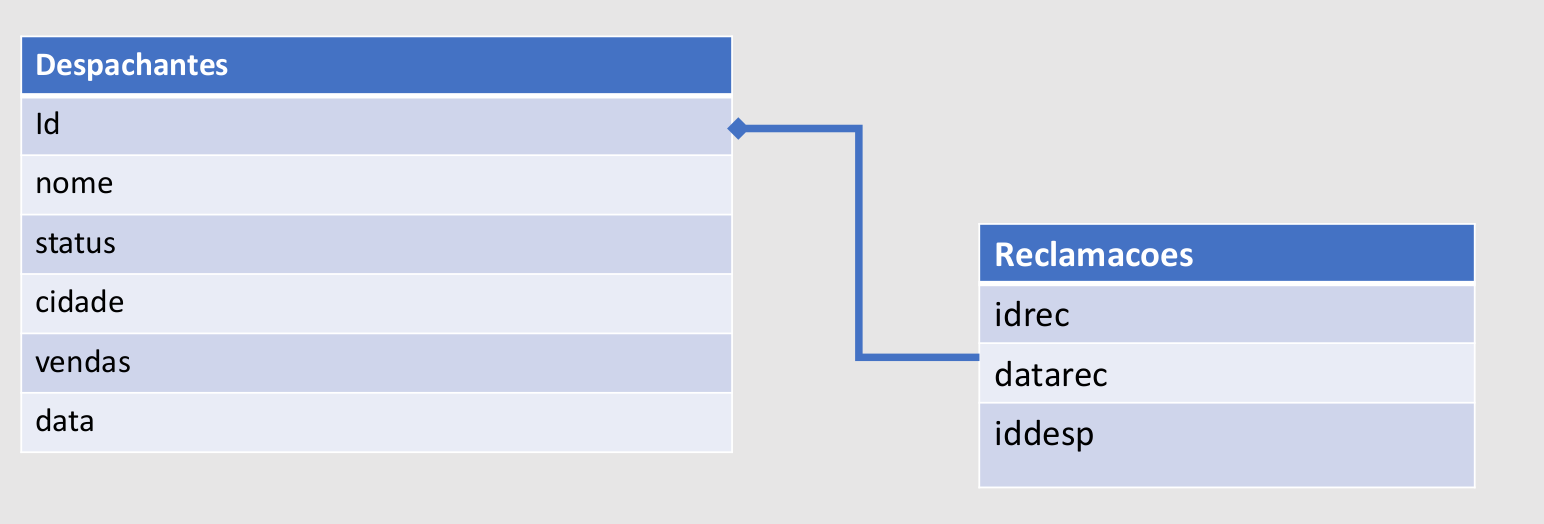

In [116]:
from IPython.display import Image
Image(filename='/home/clayton/Pictures/join.png')

### Lendo o novo Dataframe Reclamacoes

In [ ]:
# Da forma que já sabemos para realizar a leitura de um arquivo .csv

recla = spark.read.csv("/media/clayton/NewDisk/Ai2/04-PySpark/data/reclamacoes.csv", header=False)
recla.show()

In [ ]:
# Criando o schema

reclaschema = "idrec INT, datarec STRING, iddesp INT"
recla = spark.read.csv("/media/clayton/NewDisk/Ai2/04-PySpark/data/reclamacoes.csv", header=False, schema=reclaschema)
recla.show()